In [1]:
import os
from anthropic import Anthropic
from dotenv import load_dotenv
from IPython.display import Image
import base64
import mimetypes

Pass the api key in the brackets 
- client = Anthropic(ANTHROPIC_API_KEY="abc")
- if not filled in and just () it will look for an environmental key called ANTHROPIC_API_KEY

In [2]:
load_dotenv()
anthropic_api_key = os.getenv('ANTHROPIC_API_KEY')
os.environ['ANTHROPIC_API_KEY'] = anthropic_api_key
if anthropic_api_key:
    print(f"ANTHROPIC_API_KEY Key exists and begins {anthropic_api_key[:8]}")
else:
    print("ANTHROPIC_API_KEYKey not set")

client = Anthropic()

ANTHROPIC_API_KEY Key exists and begins sk-ant-a


In [3]:
MODEL_NAME="claude-3-5-sonnet-20241022"

### Multi Modal  
Deconstructing the message   
```markdown
```python
messages = [  
    {  
        "role": "user",  
        "content": "tell me a joke"  
    }  
]  

messages = [
    {
        "role": "user",

        "content": [
            {"type": "text", "text": "tell me a joke"},
        ]
    }
]

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "who"},
            {"type": "text", "text": "made"},
            {"type": "text", "text": "you?"},
        ]
    }
]


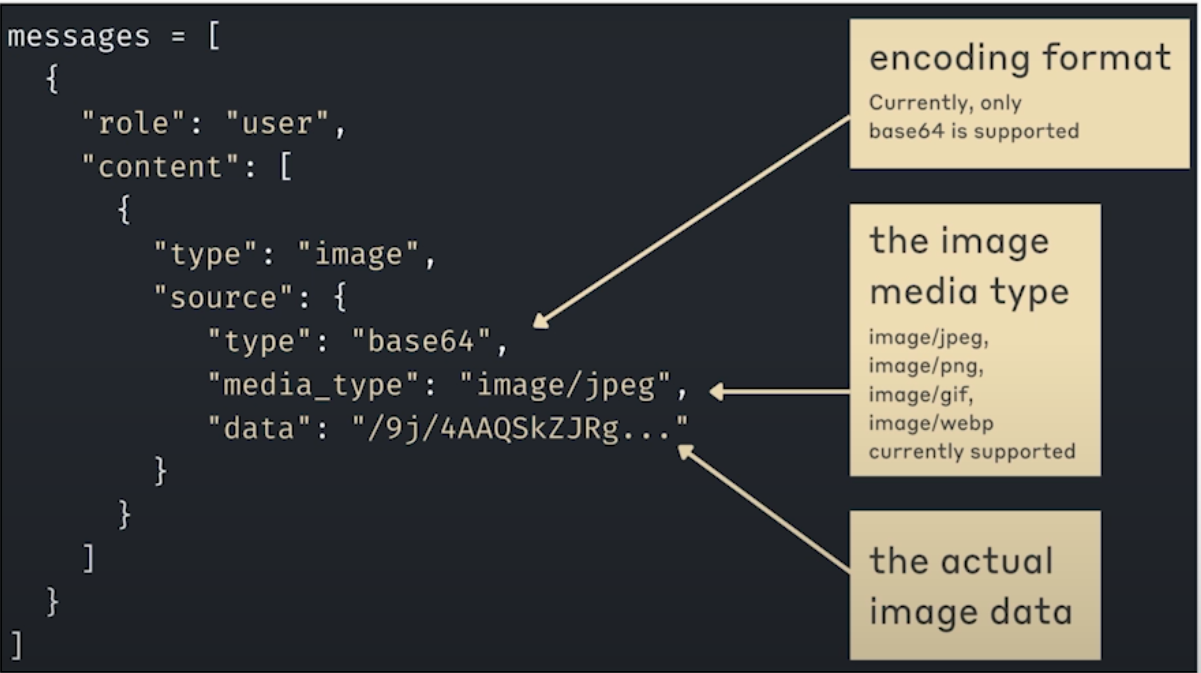

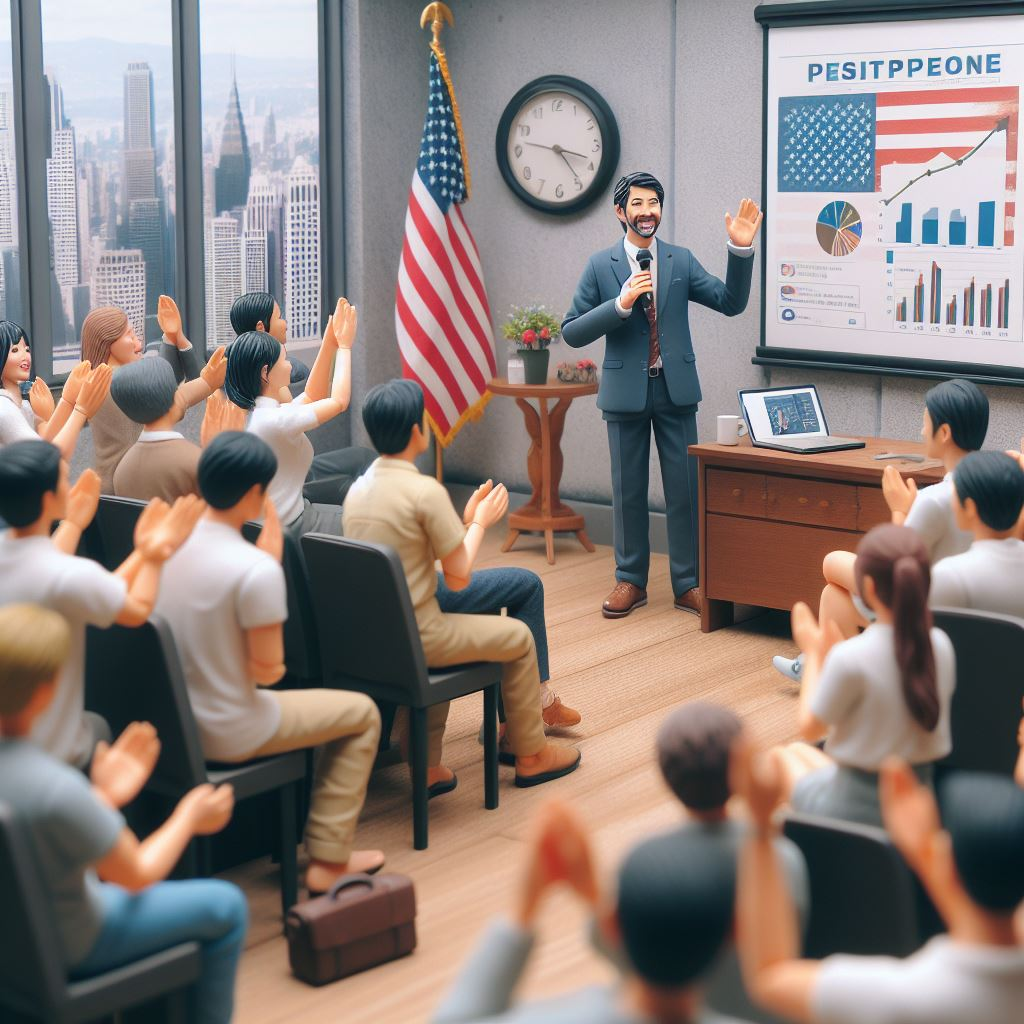

In [4]:
# def get_image_type(filename):
#     # Extract the file extension
#     file_extension = filename.lower().split('.')[-1]
    
#     # Check the file type
#     if file_extension == 'png':
#         return 'image/png'
#     elif file_extension in ['jpg', 'jpeg']:
#         return 'image/jpeg'
#     else:
#         return None  # Not a supported image type

file_name = "class.jpg"
Image(filename=file_name) 

In [5]:
def create_image_message(image_path):
    # Open the image file in "read binary" mode
    with open(image_path, "rb") as image_file:
        # Read the contents of the image as a bytes object
        binary_data = image_file.read()
    # Encode the binary data using Base64 encoding
    base64_encoded_data = base64.b64encode(binary_data)
    # Decode base64_encoded_data from bytes to a string
    base64_string = base64_encoded_data.decode('utf-8')
    # Get the MIME type of the image based on its file extension
    mime_type, _ = mimetypes.guess_type(image_path)
    # Create the image block
    image_block = {
        "type": "image",
        "source": {
            "type": "base64",
            "media_type": mime_type,
            "data": base64_string
        }
    }
    return image_block

In [6]:
messages = [
    {
        "role": "user",
        "content": [
            create_image_message(file_name),
        {
            "type": "text",
            "text": "Do you see a dog in this picture."
        }]
    }
]

In [7]:
response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=200
)
print(response.content[0].text)

No, there is no dog in this picture. The image shows a business presentation or meeting in an office setting with a presenter speaking to an audience. The room has an American flag, a wall clock, a presentation screen with graphs and charts, and appears to be in a high-rise building with a city skyline visible through the windows. The audience members are seated in chairs and appear to be raising their hands.


In [11]:
file_name = "invoice2.png"

In [12]:
messages = [
    {
        "role": "user",
        "content": [
            create_image_message(file_name),
            {"type": "text", "text": """
                Generate a JSON object representing the contents
                of this invoice.  It should include all dates,
                dollar amounts, and addresses. 
                Only respond with the JSON itself.
            """
            }]
    }
]

In [13]:
response = client.messages.create(
    messages=messages,
    model=MODEL_NAME,
    max_tokens=500
)
print(response.content[0].text)

{
  "invoice_number": "INV-000001",
  "company": {
    "name": "Zylker Design Labs",
    "address": {
      "street": "14B, Northern Street",
      "area": "Greater South Avenue",
      "city": "New York",
      "zip": "10001",
      "country": "U.S.A"
    }
  },
  "bill_to": {
    "name": "Jack Little",
    "address": {
      "street": "3242 Chandler Hollow Road",
      "city": "Pittsburgh",
      "zip": "15222",
      "state": "Pennsylvania"
    }
  },
  "ship_to": {
    "address": {
      "street": "3242 Chandler Hollow Road",
      "city": "Pittsburgh",
      "zip": "15222",
      "state": "Pennsylvania"
    }
  },
  "invoice_date": "05 Aug 2024",
  "terms": "Due on Receipt",
  "items": [
    {
      "id": 1,
      "description": "Brochure Design",
      "details": "Brochure design - Single sided (Color)",
      "quantity": 1.00,
      "rate": 900.00,
      "amount": 900.00
    },
    {
      "id": 2,
      "description": "Web Design packages(Simple)",
      "details": "10 Pages, S